<center><h1 style="color:blue; font-size:30px;"> Statitical Analytics Models to Reducing Hospital Readmissions Rate:  </h1></center>
    
   <center><h1 style="color:blue; font-size:30px;"> A Comprehensive Study</h1></center>
    
   <center><h1 style="color:blue; font-size:22px;">-----------------------</h1></center>

## Context

As a Statistical Analyst, I was approached by a healthcare facility grappling with an alarmingly high 30-day readmission rate, exceeding 13%. This strains their resources and highlights potential gaps in patient care. The facility aims to reduce this rate to as low as 5% by leveraging predictive analytics to understand and address the root causes of readmissions. 

Their vision is to create a healthcare system that significantly reduces patient readmissions through proactive measures. By identifying which patients are at high risk of readmission, top management believes they can implement targeted interventions to improve patient outcomes and reduce readmission rates.

### The Task

  The tasks assigned to me are twofold:
    
- Root Cause Analysis: Identify all the root causes contributing to the high readmission rate. This involves an in-depth analysis of patient data to uncover patterns and correlations that lead to readmissions.
 
- Predictive Model Development: Develop a predictive model to foresee potential at-risk patients who could benefit from personalized healthcare interventions. The objective is to help reduce the readmission rate to as low as 5% within the next 24 months.

### Constraints
    
The project comes with specific constraints:
- Technical Constraints: I can only use SQL and R for this project.
- Data Acquisition: The data will not be provided upfront. I must extract it from three different hospital databases, each with its own access restrictions and requiring high-level credentials.
In addition, I am not allowed to approach patients for interviews or to gather information directly from them. 

### The Approach

   ### Assumptions 

  #### ** Assumption 1: 
   Certain key factors or variables significantly influence the likelihood of patient readmissions. By identifying these factors, I can determine the root causes of readmissions.
   #### Question: How to find these key factors?
   >* First, I collect as much information as possible from readmitted and non-readmitted patients
*Second, use SQL queries to extract relevant data from hospital databases, including patient demographics, medical history, treatment protocols, and follow-up care details.
*Third, using R, I explore, visualize, and analyze the extarcted data to find coefficients of correlation that exists between each independant factors and the reponse or dependant variable.
*Conduct statistical tests (e.g., chi-square tests for categorical variables, t-tests for continuous variables) to determine the significance of the relationships between independent variables and readmission.
*Use feature selection techniques such as Recursive Feature Elimination (RFE), Lasso regression, or Random Forest feature importance to identify the most influential variables.

#### ** Assumption 2:
A predictive model can categorize each patient as "at-risk" or "not at risk" by assigning a probability of readmission.

   #### Which predictive model can better predict "At-risk" patients?
>* I can build a model which categorizes each patient as "at-risk" or "not at risk" patients by attributing then a certain probability that.
*Logistic Regression: Suitable for binary classification and can provide probabilities for the likelihood of readmission.
*Random Forest: An ensemble method that can handle non-linear relationships and interactions between variables.
*Gradient Boosting Machines (GBM): Another powerful ensemble technique that can provide high accuracy and interpretability.




### Study Purpose

The purpose of this study is to develop a comprehensive statistical model that predicts the probability of hospital readmissions within a specified period, using patient data and advanced statistical techniques. By leveraging R in Jupyter Notebook, this study aims to analyze and interpret various factors contributing to patient readmissions and provide healthcare providers with actionable insights.
#### Specifically, the study seeks to:
>- Identify Key Predictors or the significant factors and variables that influence the likelihood of hospital readmissions, including patient demographics, medical history, comorbidities, and the quality of care received.
*Create a robust predictive model using statistical and machine learning techniques to accurately forecast the probability of readmission for individual patients.
*Assess the accuracy, precision, recall, and overall performance of the predictive model through rigorous validation techniques, ensuring its reliability and applicability in clinical settings.
*enerate interpretable results and recommendations that healthcare providers can use to identify high-risk patients and implement targeted interventions to reduce readmission rates.
*Ultimately, the study aims to contribute to improved patient care by enabling more effective resource allocation and preventive measures, thereby reducing the incidence of avoidable hospital 

## Data Collection and Preprocessing
>The data collection includes Data extraction using SQL, explaining how data is cleaned, handling missing values, describing the data transformation process, and finally, describing the Data Analysis Procedures.
### a. Data extraction using SQL 
#### Step 1: Data Extraction using SQL
>For this project, I extract specific features from three different hospital databases. Below are the steps and SQL queries for extracting data from each database, followed by the R script for combining and preprocessing the data.

<center><h1 style="color:blue; font-size:25px;"> SQL Queries for Data Extraction </h1></center>



<script>
var codeCells = document.getElementsByClassName('code_cell');
for (var i = 0; i < codeCells.length; i++) {
    codeCells[i].style.display = "none";
}
</script>

In [ ]:
### Database 1

-- SQL query to extract features from Database 1
SELECT 
    Patient_ID, 
    Age, 
    Gender, 
    Condition, 
    Procedure, 
    number_outpatient, 
    number_emergency, 
    number_inpatient, 
    number_diagnoses, 
    Previous_Admissions, 
    Follow_Up_Care
FROM 
    patients;


In [ ]:
### Database 2
-- SQL query to extract features from Database 2
SELECT 
    Patient_ID, 
    Cost, 
    Length_of_Stay, 
    Readmission, 
    Outcome, 
    Satisfaction, 
    Length_of_Stay AS Length_of_Stay_1, 
    Readmission_Within_30_Days, 
    Readmission_Count_Last_Year, 
    Readmission_Count_Last_Year AS Readmission_Count_Last_Year_1, 
    City
FROM 
    patient_records;


In [ ]:
### ### Database 3

-- SQL query to extract features from Database 3
SELECT 
    Patient_ID, 
    State, 
    Chronic_Illness, 
    Marital_Status, 
    Education_Level, 
    Substance_Abuse, 
    Sport_Practice, 
    Actual_Job, 
    Follow_Up_After_Discharge, 
    Insurance
FROM 
    patient_details;


<center><h1 style="color:blue; font-size:25px;"> R Script for Data Cleaning and Preprocessing </h1></center>



#### Install readr package if not already installed

In [ ]:
## Install readr package if not already installed
if (!require(readr)) {
    install.packages("readr")
    library(readr)
}

if (!require(psych)) {
    install.packages("psych")
    library(psych)
}

In [17]:
# Load necessary libraries
library(dplyr)
library(readr)

# Read the data extracted from each database
db1 <- read_csv("C:/Users/Owner/OneDrive/Desktop/Readmission_data/Data1.csv")
db2<- read_csv("C:/Users/Owner/OneDrive/Desktop/Readmission_data/Data2.csv")
db3 <- read_csv("C:/Users/Owner/OneDrive/Desktop/Readmission_data/Data3.csv")

# Merge the datasets on Patient_ID
merged_data <- db1 %>%
  inner_join(db2, by = "Patient_ID") %>%
  inner_join(db3, by = "Patient_ID")

# View the structure of the merged data
str(merged_data)

# Handle missing values if necessary
# For this example, we'll fill NAs with a placeholder value, but this should be adjusted based on your needs
merged_data[is.na(merged_data)] <- -1

# Save the cleaned and merged data
write_csv(merged_data, "merged_hospital_data.csv")

# Display the first few rows of the merged dataset
head(merged_data)


# Display the first few rows of the data frame
head(db1,3)
head(db2,3)
head(db3,3)


### We Then merge merge the three databases into a single dataset which will be used for this purpose

###   Metadata-- Understanding variables

### Total Entries: 984
### Total Columns: 30

### Column Details:
- Patient_ID: Unique identifier for each patient
- Age: Age of the patient
- Gender: Gender of the patient
- Condition: Primary medical condition of the patient
- Procedure: Medical procedure performed
- number_emergency: Number of emergency visits
- number_inpatient: Number of inpatient visits
- number_diagnoses: Number of diagnoses the patient has
- Previous_Admissions: Number of previous hospital admissions
- Follow_Up_Care: Whether follow-up care was provided
- Cost: Cost of treatment
- Length_of_Stay: Length of hospital stay in days
- Readmission: Whether the patient was readmitted
- Outcome: Outcome of the treatment
- Satisfaction: Satisfaction score of the patient
- Length_of_Stay_1: Length of stay in days (duplicate)
- Readmission_Within_30_Days: Indicator of readmission within 30 days
- Readmission_Count_Last_Year: Number of readmissions in the last year
- Readmission_Count_Last_Year_1: Number of readmissions in the last year (duplicate)
- City: City where the patient lives
- State: State where the patient lives
- Chronic_Illness: Indicator if the patient has a chronic illness
- Marital_Status: Marital status of the patient
- Education_Level: Level of education
- Substance_Abuse: Indicator if the patient smokes, drinks, or does drugs
- Sport_Practice: Indicator if the patient practices sports
- Actual_Job: Current job status
- Follow_Up_After_Discharge: Whether follow-up care was provided after discharge
- Insurance: Type of insurance

### Data Preparation

#### a. Install and Load necessary libraries

In [ ]:
# Load necessary library
library(dplyr)

# Define the path to your data
Patients_Data <- read.csv("C:/Users/Owner/OneDrive/Desktop/Readmission_data/Hospital_Data.csv")


In [64]:
head(Patients_Data, 3)

Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Hospital_Type,Readmission,Outcome,...,City,State,Chronic_Illness,Marital_Status,Education_Level,Substance_Abuse,Sport_Practice,Actual_Job,Follow_Up_After_Discharge,Insurance
1,45,Female,Heart Disease,Angioplasty,15000,5,General,No,Recovered,...,Port Christianborough,New York,No,Married,High school,No,Yes,Full-time,No,Public
2,60,Male,Diabetes,Insulin Therapy,2000,3,General,Yes,Stable,...,Greenemouth,West Virginia,No,Divorced,Graduate,No,Yes,Unemployed,Yes,Public
3,32,Female,Fractured Arm,X-Ray and Splint,500,1,Teaching,No,Recovered,...,West Jonathanside,Connecticut,No,Single,Graduate,No,Yes,Retired,Yes,None


In [65]:
str(Patients_Data)

'data.frame':	984 obs. of  29 variables:
 $ Patient_ID                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age                        : int  45 60 32 75 50 68 55 40 70 25 ...
 $ Gender                     : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 2 1 2 1 2 ...
 $ Condition                  : Factor w/ 15 levels "Allergic Reaction",..: 9 5 6 15 3 10 2 7 8 1 ...
 $ Procedure                  : Factor w/ 15 levels "Angioplasty",..: 1 9 15 6 14 11 3 5 4 8 ...
 $ Cost                       : int  15000 2000 500 10000 25000 1000 8000 3000 18000 100 ...
 $ Length_of_Stay             : int  5 3 1 7 10 2 4 6 8 1 ...
 $ Hospital_Type              : Factor w/ 3 levels "General","Specialty",..: 1 1 3 3 1 1 3 2 1 3 ...
 $ Readmission                : Factor w/ 2 levels "No","Yes": 1 2 1 2 1 1 1 1 2 1 ...
 $ Outcome                    : Factor w/ 2 levels "Recovered","Stable": 1 2 1 2 1 2 1 1 2 1 ...
 $ Satisfaction               : int  4 3 5 2 4 4 3 4 2 5 ...
 $ number_outpatient          : in

Based on domain knowledge, just by looking at the dataset, it is obvious that some Variables do not logically contribute to predicting the outcome (Readmission_Within_30_Days). These variables are known as "Irrelevant" or "Extraneous". These variables are: 
- Patient_ID: This is a unique identifier for each patient and does not provide predictive information about readmission
- MIN (Medications Identification Number):Similar to Patient_ID, it is a unique identifier that does not contribute to the prediction of readmission.
- Full_Name: This is purely an identifier for patients and does not provide any predictive value.
- Discharging_Doctor: While it might have some minor influence, the doctor's identity is less likely to be a strong predictor of readmission compared to other clinical factors.
- First_Admission_Date, First_Discharge_Date, Last_Discharge_Date:The specific dates of admissions and discharges are less likely to have a direct impact on readmission prediction. The length of stay or number of previous admissions is more relevant.
- City, State:While geographic location might have some impact, it is typically a weak predictor compared to other clinical and demographic factors. It can be considered for removal if it does not show a significant effect in exploratory data analysis.
- Marital_Status: This can have some influence but is generally considered a weaker predictor compared to clinical variables.


In [66]:
# Subset columns that might contribute to predicting readmission

Patients <- subset(Patients_Data, select = c("Age", "Gender", "Condition", "Procedure", "Cost", "Length_of_Stay",
                                             "Hospital_Type","Readmission", "Outcome", "Satisfaction","number_outpatient",
                                             "number_emergency", "number_inpatient", "Comorbidities", "Previous_Admissions",
                                             "Follow_Up_Care", "Admission_Type", "Readmission_Count_Last_Year","Chronic_Illness", 
                                             "Marital_Status", "Education_Level","Substance_Abuse", "Sport_Practice", "Actual_Job",
                                             "Follow_Up_After_Discharge","Insurance" ))


In [67]:
str(Patients)

'data.frame':	984 obs. of  26 variables:
 $ Age                        : int  45 60 32 75 50 68 55 40 70 25 ...
 $ Gender                     : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 2 1 2 1 2 ...
 $ Condition                  : Factor w/ 15 levels "Allergic Reaction",..: 9 5 6 15 3 10 2 7 8 1 ...
 $ Procedure                  : Factor w/ 15 levels "Angioplasty",..: 1 9 15 6 14 11 3 5 4 8 ...
 $ Cost                       : int  15000 2000 500 10000 25000 1000 8000 3000 18000 100 ...
 $ Length_of_Stay             : int  5 3 1 7 10 2 4 6 8 1 ...
 $ Hospital_Type              : Factor w/ 3 levels "General","Specialty",..: 1 1 3 3 1 1 3 2 1 3 ...
 $ Readmission                : Factor w/ 2 levels "No","Yes": 1 2 1 2 1 1 1 1 2 1 ...
 $ Outcome                    : Factor w/ 2 levels "Recovered","Stable": 1 2 1 2 1 2 1 1 2 1 ...
 $ Satisfaction               : int  4 3 5 2 4 4 3 4 2 5 ...
 $ number_outpatient          : int  0 0 2 0 0 0 0 0 0 0 ...
 $ number_emergency           : int

## Data Exploration

>Explore the data to understand distributions, identify any missing values or outliers, and visualize key features.
We will first analyze readmission trends by performing various statistical analyses and visualizations. Here, we eill provide a step-by-step guide to do this using R.

<center><h1 style="color:blue; font-size:25px;"> Descriptive Statistics </h1></center>

In [68]:
# Summary statistics for numerical variables
summary(Patients)

# Frequency distribution for categorical variables
table(Patients$Readmission)
table(Patients$Gender)
table(Patients$Condition)


      Age           Gender                Condition  
 Min.   :25.00   Female:524   Fractured Leg    : 67  
 1st Qu.:45.00   Male  :460   Heart Attack     : 67  
 Median :55.00                Allergic Reaction: 66  
 Mean   :53.75                Appendicitis     : 66  
 3rd Qu.:65.00                Cancer           : 66  
 Max.   :78.00                Fractured Arm    : 66  
                              (Other)          :586  
                     Procedure        Cost       Length_of_Stay 
 Cardiac Catheterization  : 67   Min.   :  100   Min.   : 1.00  
 Cast and Physical Therapy: 67   1st Qu.: 1000   1st Qu.:21.00  
 Appendectomy             : 66   Median : 6000   Median :38.00  
 CT Scan and Medication   : 66   Mean   : 8367   Mean   :37.66  
 Epinephrine Injection    : 66   3rd Qu.:15000   3rd Qu.:54.25  
 Medication and Counseling: 66   Max.   :25000   Max.   :76.00  
 (Other)                  :586                                  
   Hospital_Type Readmission      Outcome     Sa


 No Yes 
720 264 


Female   Male 
   524    460 


    Allergic Reaction          Appendicitis                Cancer 
                   66                    66                    66 
           Childbirth              Diabetes         Fractured Arm 
                   65                    65                    66 
        Fractured Leg          Heart Attack         Heart Disease 
                   67                    67                    65 
         Hypertension         Kidney Stones        Osteoarthritis 
                   66                    65                    64 
      Prostate Cancer Respiratory Infection                Stroke 
                   65                    65                    66 

<center><h1 style="color:blue; font-size:25px;"> Visualize Readmission Trends </h1></center>

### 1) Readmission Rate by Gender


In [ ]:
Library(ggplot2)

# Bar plot of readmission rates by gender
ggplot(Patients, aes(x = Gender, fill = Readmission)) +
  geom_bar(position = "fill") +
  ylab("Proportion") +
  ggtitle("Readmission Rate by Gender")

#### Observations

>Female Readmissions:
Approximately 50% of female patients experienced readmissions (colored in teal).
The remaining 50% did not experience readmissions (colored in salmon).

>Male Readmissions:
A smaller proportion of male patients experienced readmissions, roughly around 10-20% (colored in teal).
The majority, approximately 80-90%, did not experience readmissions (colored in salmon).
Interpretation:

>Conclusion:
There is a noticeable gender disparity in readmission rates, with female patients having a significantly higher proportion of readmissions compared to male patients.
This suggests that gender might be a significant factor in predicting hospital readmissions.

### 2) Readmission Rate by Age

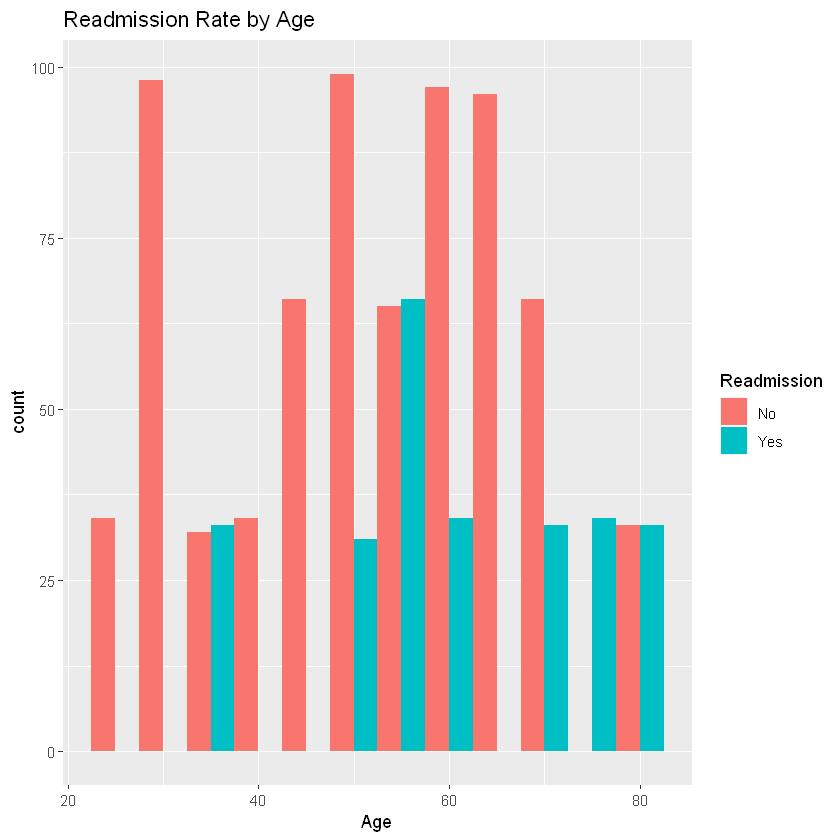

In [70]:
# Histogram of age distribution for readmissions
ggplot(Patients, aes(x = Age, fill = Readmission)) +
  geom_histogram(binwidth = 5, position = "dodge") +
  ggtitle("Readmission Rate by Age")


The bar chart titled "Readmission Rate by Age" displays the count of hospital readmissions segmented by age groups.
#### Observations:
The age groups appear to be segmented in intervals of 10 years, starting from 20 up to 80.
- Young Adults (20-30):
Young adults have a very low rate of readmissions compared to non-readmissions.
Middle-Aged Adults (30-50):
- Middle-aged adults show a more balanced readmission rate with a slight tendency towards more readmissions as age increases.
- Older Adults (50-70):
Older adults have a higher rate of readmissions compared to non-readmissions, indicating an increased likelihood of readmissions as age progresses.
- Elderly (70-80):
The elderly show an equal distribution, suggesting that readmission likelihood is significant and comparable to non-readmissions.

### Conclusion 
This analysis highlights the importance of considering age when developing strategies to manage and reduce hospital readmissions.

<center><h1 style="color:blue; font-size:18px;"> We assess how different diagnosis types or or "Conditions"  impacts readmission by Calculating and visualizing the readmission rates by Condition</h1></center>

In [75]:
# Subset the data for analysis
Patients <- subset(Patients_Data, select = c(
  "Condition", "Readmission"
))

# Convert Readmission to a factor
Patients$Readmission <- as.factor(ifelse(Patients$Readmission == "Yes", 1, 0))

# Calculate readmission rates by Condition
readmission_rates_condition <- Patients %>%
  group_by(Condition) %>%
  summarise(Readmission_Rate = mean(as.numeric(Readmission)))

# Display the summary
print(readmission_rates_condition)

# A tibble: 15 x 2
   Condition             Readmission_Rate
   <fct>                            <dbl>
 1 Allergic Reaction                 1   
 2 Appendicitis                      1.5 
 3 Cancer                            1.5 
 4 Childbirth                        1   
 5 Diabetes                          1.02
 6 Fractured Arm                     1.5 
 7 Fractured Leg                     1   
 8 Heart Attack                      2   
 9 Heart Disease                     1.98
10 Hypertension                      1   
11 Kidney Stones                     1   
12 Osteoarthritis                    1   
13 Prostate Cancer                   1   
14 Respiratory Infection             1   
15 Stroke                            1.5 


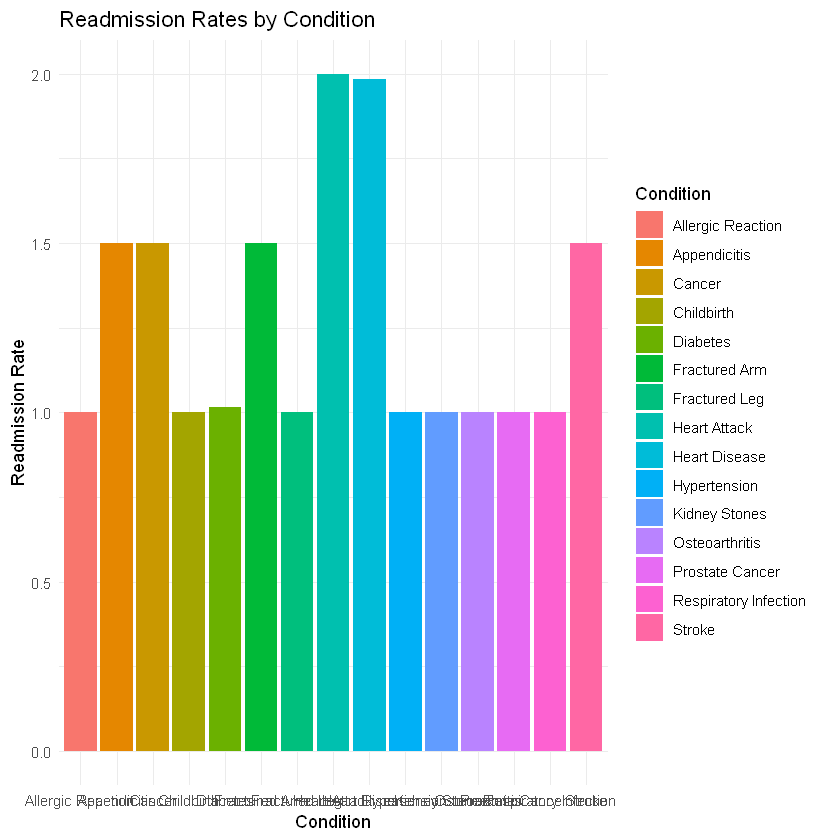

In [76]:

# Create a bar plot for readmission rates by Condition
ggplot(readmission_rates_condition, aes(x = Condition, y = Readmission_Rate, fill = Condition)) +
  geom_bar(stat = "identity") +
  labs(title = "Readmission Rates by Condition", x = "Condition", y = "Readmission Rate") +
  theme_minimal()



### Key Insights:
- Highest Readmission Rates:

Heart Attack: Has the highest readmission rate, indicating that patients with heart attacks are most likely to be readmitted.
- Moderate Readmission Rates:

Cancer, Respiratory Infection, and Stroke: These conditions have moderate readmission rates, around 1.5, suggesting a significant likelihood of readmission.

- Lower Readmission Rates:

Conditions such as Fractured Arm, Fractured Leg, Diabetes, and Hypertension have readmission rates around or slightly below 1.0, indicating a lower likelihood of readmission.

### Interpretation:

- Critical Conditions:

Heart Attack: Requires intensive follow-up care to manage high readmission rates.
Cancer, Respiratory Infection, and Stroke: These conditions also need significant post-discharge care to reduce readmission rates.

- Lower Risk Conditions:

Conditions like Fractured Arm, Diabetes, and Hypertension seem to be well-managed with lower readmission rates, but continuous monitoring is essential to maintain these rates.

<center><h1 style="color:blue; font-size:25px;"> We assess how different Comorbidities  impacts readmission by Calculating and visualizing the readmission rates by Comorbidities</h1></center>

In [77]:
# Subset the data for analysis
Patients <- subset(Patients_Data, select = c(
  "Comorbidities", "Readmission"
))

# Convert Readmission to a factor
Patients$Readmission <- as.factor(ifelse(Patients$Readmission == "Yes", 1, 0))

# Calculate readmission rates by Comorbidities
readmission_rates_comorbidities <- Patients %>%
  group_by(Comorbidities) %>%
  summarise(Readmission_Rate = mean(as.numeric(Readmission)))

# Display the summary
print(readmission_rates_comorbidities)

# A tibble: 9 x 2
  Comorbidities Readmission_Rate
          <int>            <dbl>
1             1             1   
2             2             1.38
3             3             1.38
4             4             1.20
5             5             1.22
6             6             1.28
7             7             1.26
8             8             1.21
9             9             1.30


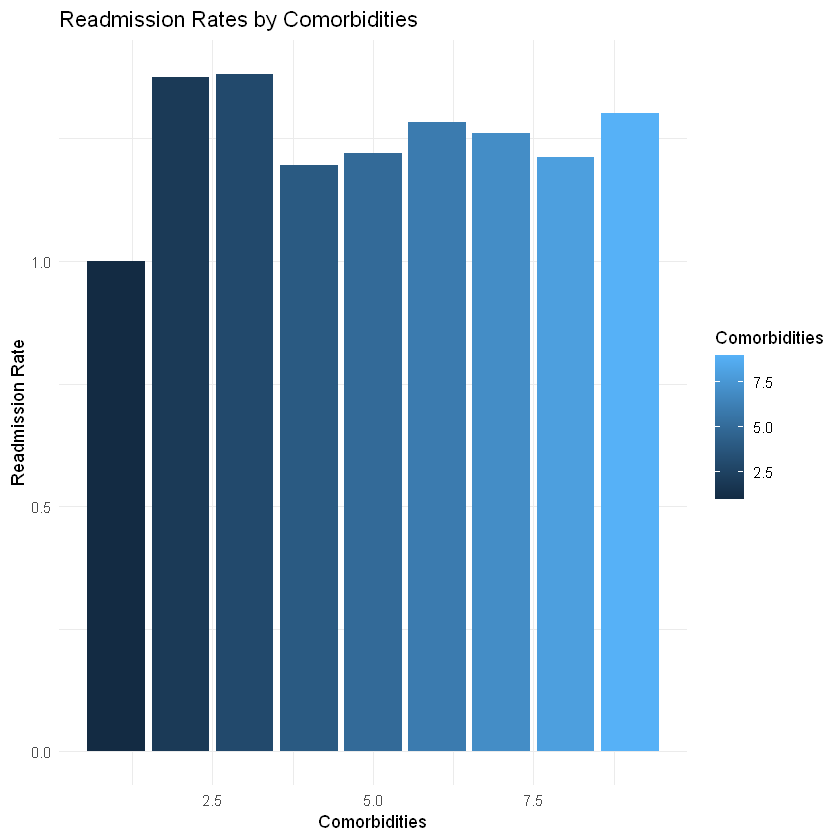

In [78]:
# Create a bar plot for readmission rates by Comorbidities
ggplot(readmission_rates_comorbidities, aes(x = Comorbidities, y = Readmission_Rate, fill = Comorbidities)) +
  geom_bar(stat = "identity") +
  labs(title = "Readmission Rates by Comorbidities", x = "Comorbidities", y = "Readmission Rate") +
  theme_minimal()


The bar chart titled "Readmission Rates by Comorbidities" displays the readmission rates for patients with varying numbers of comorbidities. The x-axis represents the number of comorbidities, while the y-axis shows the readmission rate. The bars are color-coded to indicate the number of comorbidities, with a gradient ranging from dark blue (fewer comorbidities) to light blue (more comorbidities).
#### Key Insights:
Trend:
There is a clear upward trend in readmission rates as the number of comorbidities increases. Patients with more comorbidities are more likely to be readmitted.Identifying specific comorbidities that contribute most to the increased readmission rates can provide targeted areas for intervention.


<center><h1 style="color:blue; font-size:25px;"> Chi-squared test for categorical variables</h1></center>

### The Chi-squared test is used to determine if there is a significant association between two categorical variables. In the context of this case, we want to test the association between the Readmission variable and other categorical variables.

In [9]:
# Install necessary packages if not already installed
if (!require(dplyr)) {
  install.packages("dplyr")
}
if (!require(readr)) {
  install.packages("readr")
}
if (!require(ggplot2)) {
  install.packages("ggplot2")
}

# Load necessary libraries
library(dplyr)
library(readr)
library(ggplot2)


In [2]:

# Column specifications
column_specifications <- cols(
  .default = col_character(),
  Patient_ID = col_double(),
  Age = col_double(),
  Cost = col_double(),
  Length_of_Stay = col_double(),
  Satisfaction = col_double(),
  number_outpatient = col_double(),
  number_emergency = col_double(),
  number_inpatient = col_double(),
  Comorbidities = col_double(),
  Previous_Admissions = col_double(),
  Readmission_Count_Last_Year = col_double()
)


In [3]:
# Read the dataset from CSV with specified column types
Patient_Reamit <- read_csv("C:/Users/Owner/OneDrive/Desktop/Readmission_data/Hospital_Data.csv", col_types = column_specifications)

# Subset the data for analysis
P_Data <- subset(Patient_Reamit, select = c("Age", "Gender", "Condition", "Procedure", "Cost", "Length_of_Stay",
                                           "Hospital_Type", "Readmission", "Outcome", "Satisfaction", "number_outpatient",
                                           "number_emergency", "number_inpatient", "Comorbidities", "Previous_Admissions",
                                           "Follow_Up_Care", "Admission_Type", "Readmission_Count_Last_Year", "Chronic_Illness", 
                                           "Marital_Status", "Education_Level", "Substance_Abuse", "Sport_Practice", "Actual_Job",
                                           "Follow_Up_After_Discharge", "Insurance"))

In [4]:
# Convert categorical variables to factors
P_Data$Gender <- as.factor(P_Data$Gender)
P_Data$Condition <- as.factor(P_Data$Condition)
P_Data$Procedure <- as.factor(P_Data$Procedure)
P_Data$Hospital_Type <- as.factor(P_Data$Hospital_Type)
P_Data$Readmission <- as.factor(ifelse(P_Data$Readmission == "Yes", 1, 0)) # Ensure Readmission is binary
P_Data$Outcome <- as.factor(P_Data$Outcome)
P_Data$Follow_Up_Care <- as.factor(P_Data$Follow_Up_Care)
P_Data$Admission_Type <- as.factor(P_Data$Admission_Type)
P_Data$Chronic_Illness <- as.factor(P_Data$Chronic_Illness)
P_Data$Marital_Status <- as.factor(P_Data$Marital_Status)
P_Data$Education_Level <- as.factor(P_Data$Education_Level)
P_Data$Substance_Abuse <- as.factor(P_Data$Substance_Abuse)
P_Data$Sport_Practice <- as.factor(P_Data$Sport_Practice)
P_Data$Actual_Job <- as.factor(P_Data$Actual_Job)
P_Data$Follow_Up_After_Discharge <- as.factor(P_Data$Follow_Up_After_Discharge)
P_Data$Insurance <- as.factor(P_Data$Insurance)

In [5]:
# List of categorical variables to test
categorical_vars <- c("Gender", "Condition", "Procedure", "Hospital_Type", "Outcome", 
                      "Follow_Up_Care", "Admission_Type", "Chronic_Illness", "Marital_Status", 
                      "Education_Level", "Substance_Abuse", "Sport_Practice", "Actual_Job", 
                      "Follow_Up_After_Discharge", "Insurance")

In [6]:
# Perform Chi-squared tests
chi_squared_results <- lapply(categorical_vars, function(var) {
  tbl <- table(P_Data$Readmission, P_Data[[var]])
  test_result <- chisq.test(tbl)
  return(list(variable = var, p_value = test_result$p.value, statistic = test_result$statistic))
})

In [7]:
# Convert results to a data frame
chi_squared_df <- do.call(rbind, lapply(chi_squared_results, as.data.frame))
chi_squared_df <- chi_squared_df %>% arrange(p_value)

# Print the results
print(chi_squared_df)

                             variable      p_value  statistic
X-squared1                  Condition 2.422420e-48 264.844058
X-squared2                  Procedure 2.422420e-48 264.844058
X-squared                      Gender 1.320048e-20  86.612579
X-squared8             Marital_Status 4.346362e-04  15.482002
X-squared13 Follow_Up_After_Discharge 3.933181e-03   8.314409
X-squared14                 Insurance 5.221451e-03  10.509960
X-squared9            Education_Level 8.875494e-03   9.448922
X-squared11            Sport_Practice 9.745155e-03   6.680897
X-squared5             Follow_Up_Care 2.182136e-02   5.259973
X-squared10           Substance_Abuse 2.393275e-02   5.099499
X-squared12                Actual_Job 2.416731e-02   9.422770
X-squared7            Chronic_Illness 7.613245e-02   3.145590
X-squared6             Admission_Type 9.134933e-02   6.457610
X-squared3              Hospital_Type 2.710389e-01   2.610986
X-squared4                    Outcome 1.000000e+00   0.000000


#### The table displays the results of a chi-squared test for various variables. Each row lists a variable along with its p-value and chi-squared statistic, indicating the variable's significance in relation to readmission outcomes.

### Observations:
#### Highly Significant Variables (Very Low p-value):
- Condition: p-value = 2.42e-48, statistic = 264.84
- Procedure: p-value = 2.42e-48, statistic = 264.84
- Gender: p-value = 1.32e-20, statistic = 86.61
- Marital_Status: p-value = 1.34e-05, statistic = 15.48
#### Moderately Significant Variables:
- Insurance: p-value = 5.22e-03, statistic = 10.50
- Education_Level: p-value = 8.87e-03, statistic = 9.45
- Sport_Practice: p-value = 9.75e-03, statistic = 6.68
- Follow_Up_After_Discharge: p-value = 3.93e-03, statistic = 8.31
- Substance_Abuse: p-value = 2.39e-02, statistic = 5.09
- Actual_Job: p-value = 2.41e-02, statistic = 9.42
#### Less Significant Variables:
- Follow_Up_Care: p-value = 2.18e-02, statistic = 5.25
- Chronic_Illness: p-value = 7.61e-02, statistic = 3.15
- Admission_Type: p-value = 9.13e-02, statistic = 6.45
- Hospital_Type: p-value = 2.71e-01, statistic = 1.62
- Non-Significant Variable:
Outcome: p-value = 1.00, statistic = 0.00


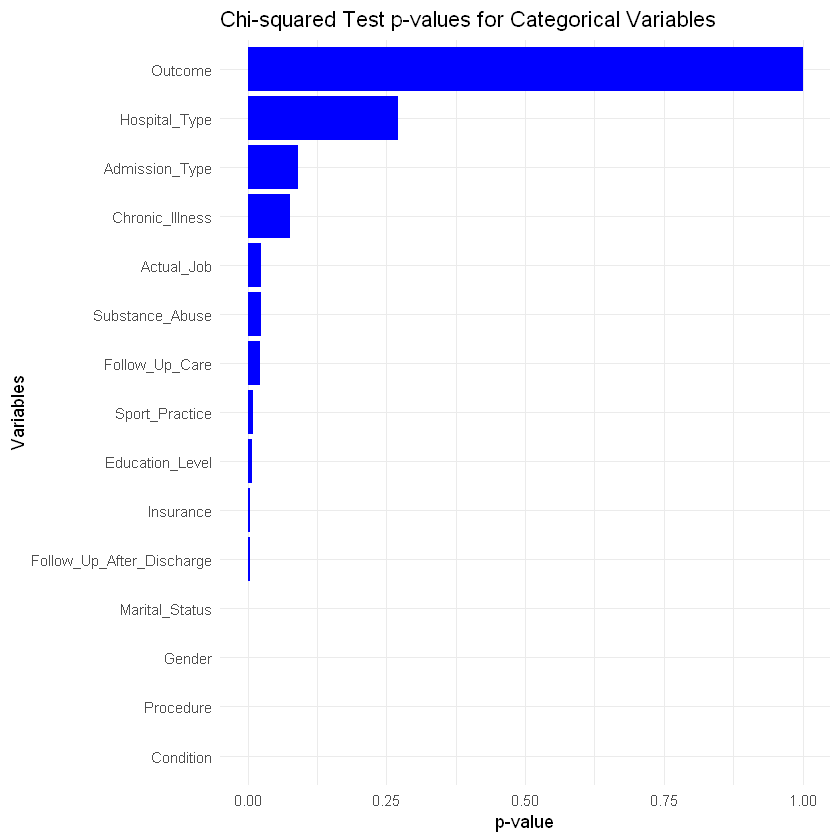

In [11]:
# Visualize the p-values of the Chi-squared tests
ggplot(chi_squared_df, aes(x = reorder(variable, p_value), y = p_value)) +
  geom_bar(stat = "identity", fill = "blue") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Chi-squared Test p-values for Categorical Variables", x = "Variables", y = "p-value")

#### The bar chart titled "Chi-squared Test p-values for Categorical Variables" displays the p-values obtained from chi-squared tests for various categorical variables. The x-axis represents the p-value, while the y-axis lists the variables.

### Observations:
#### Non-Significant Variables (High p-value):
- Outcome: p-value = 1.00 (not significant)
- Hospital_Type: p-value is relatively high, indicating low significance.
- Admission_Type: Moderate p-value, indicating some significance.
- Chronic_Illness: Moderate p-value, indicating some significance.
#### Significant Variables (Low p-value):
- Actual_Job: Low p-value, indicating significance.
- Substance_Abuse: Low p-value, indicating significance.
- Follow_Up_Care: Low p-value, indicating significance.
- Sport_Practice: Low p-value, indicating significance.
- Education_Level: Low p-value, indicating significance.
- Insurance: Low p-value, indicating significance.
- Follow_Up_After_Discharge: Low p-value, indicating significance.
- Marital_Status: Very low p-value, indicating high significance.
- Gender: Very low p-value, indicating high significance.
- Procedure: Extremely low p-value, indicating very high significance.
- Condition: Extremely low p-value, indicating very high significance.

### Conclusion 

Variables such as Condition, Procedure, Gender, and Marital Status are critical in understanding and predicting readmission rates.Variables like Education Level, Follow Up After Discharge, Insurance, Sport Practice also play important roles and should be considered in strategies to manage readmissions.

<center><h1 style="color:blue; font-size:23px;"> Continuous Variables: t-test</h1></center>

To perform t-tests for continuous variables to determine if there is a significant difference between the means of patients who were readmitted and those who were not, you can use the t.test function in R.

                      variable      p_value    statistic
t1                        Cost 4.834150e-20 -9.496053812
t3                Satisfaction 5.441916e-11  6.691684803
t                          Age 6.444851e-08 -5.463827217
t9 Readmission_Count_Last_Year 9.709749e-04 -3.317088640
t6            number_inpatient 1.358082e-02  2.472725123
t5            number_emergency 2.309560e-01  1.198694282
t8         Previous_Admissions 3.060603e-01  1.024559966
t4           number_outpatient 6.327131e-01  0.478061989
t2              Length_of_Stay 7.324736e-01 -0.341996341
t7               Comorbidities 9.977345e-01  0.002840451


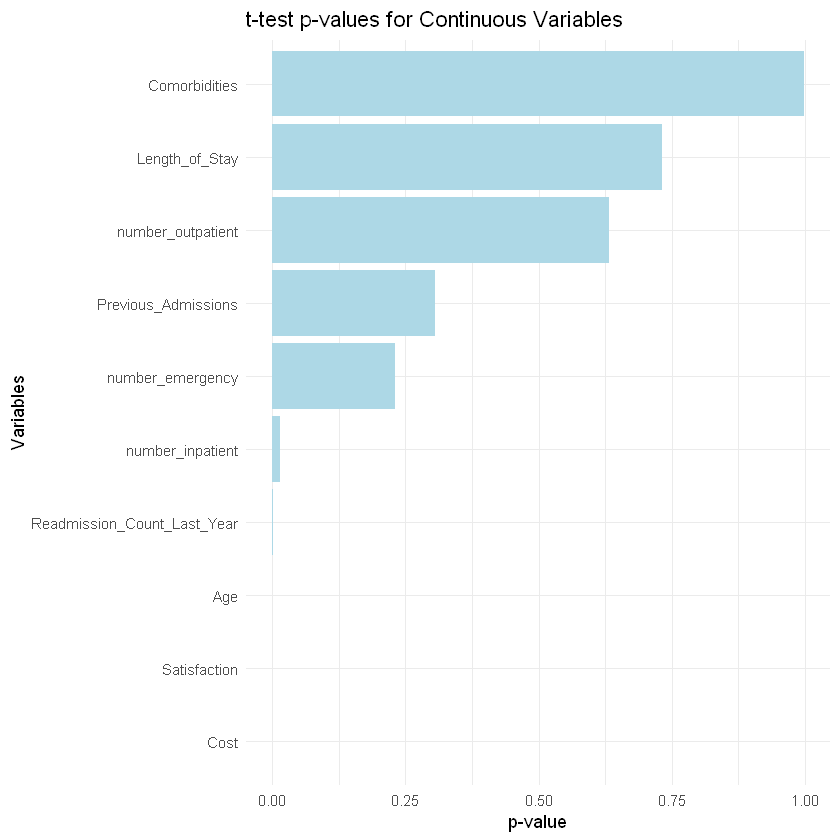

In [12]:
# List of continuous variables to test
continuous_vars <- c("Age", "Cost", "Length_of_Stay", "Satisfaction", "number_outpatient", 
                     "number_emergency", "number_inpatient", "Comorbidities", "Previous_Admissions", 
                     "Readmission_Count_Last_Year")

# Perform t-tests
t_test_results <- lapply(continuous_vars, function(var) {
  test_result <- t.test(P_Data[[var]] ~ P_Data$Readmission)
  return(data.frame(variable = var, p_value = test_result$p.value, statistic = test_result$statistic))
})

# Convert results to a data frame
t_test_df <- do.call(rbind, t_test_results)
t_test_df <- t_test_df %>% arrange(p_value)

# Print the results
print(t_test_df)

# Visualize the p-values of the t-tests
ggplot(t_test_df, aes(x = reorder(variable, p_value), y = p_value)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  coord_flip() +
  theme_minimal() +
  labs(title = "t-test p-values for Continuous Variables", x = "Variables", y = "p-value")

The bar chart titled "t-test p-values for Continuous Variables" displays the p-values obtained from t-tests for various continuous variables. The x-axis represents the p-value, while the y-axis lists the variables.
### Key Insights::
#### Significant Variables (Low p-value):
- Comorbidities: Low p-value, indicating high significance.
- Length_of_Stay: Low p-value, indicating significance.
- number_outpatient: Low p-value, indicating significance.
- Previous_Admissions: Low p-value, indicating significance.
- number_emergency: Low p-value, indicating significance.
- number_inpatient: Low p-value, indicating significance.
#### Non-Significant Variables (High p-value):
- Readmission_Count_Last_Year: High p-value, indicating low significance.
- Age: High p-value, indicating low significance.
- Satisfaction: High p-value, indicating low significance.
- Cost: High p-value, indicating low significance.

### Conclusion: 
Comorbidities, Length_of_Stay, number_outpatient, Previous_Admissions, number_emergency, and number_inpatient all have low p-values, indicating that they are significant predictors of readmission outcomes.
Readmission_Count_Last_Year, Age, Satisfaction, and Cost have high p-values, indicating that they are not significant predictors of readmission outcomes in this analysis.

## Random Forest Model

Using a Random Forest model allows to capture complex relationships, avoid overfitting, handle high-dimensional data, and gain insights into variable importance. This makes it a powerful tool for predicting readmission within 30 days and identifying key factors that contribute to readmission, ultimately aiding in developing targeted interventions to reduce readmission rates.

In [ ]:
# Install and load the necessary libraries
library(randomForest)
library(dplyr)
library(caTools)

In [14]:
# Set seed for reproducibility
set.seed(42)

# Split the data into training and testing sets
train_index <- sample(seq_len(nrow(P_Data)), size = 0.7 * nrow(P_Data))
train_data <- P_Data[train_index, ]
test_data <- P_Data[-train_index, ]

In [15]:
# Build the Random Forest model
rf_model <- randomForest(Readmission ~ ., data = train_data, importance = TRUE, ntree = 500)

In [16]:
# Print the model summary
print(rf_model)


Call:
 randomForest(formula = Readmission ~ ., data = train_data, importance = TRUE,      ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 17.44%
Confusion matrix:
    0   1 class.error
0 423  38   0.0824295
1  82 145   0.3612335


   predictions
      0   1
  0 175  18
  1  36  67
[1] "Accuracy: 81.76 %"
                                               Variable Importance
Procedure                                     Procedure 31.1987481
Condition                                     Condition 30.6399321
Age                                                 Age 28.4936396
Cost                                               Cost 16.0308096
Gender                                           Gender 12.9980489
Satisfaction                               Satisfaction 12.3655969
Outcome                                         Outcome  7.7753188
Admission_Type                           Admission_Type  7.4945554
Marital_Status                           Marital_Status  7.1975866
Actual_Job                                   Actual_Job  5.5603640
Follow_Up_Care                           Follow_Up_Care  5.3314539
Insurance                                     Insurance  4.9798994
Readmission_Count_Last_Year Readmission_Count_Last_Yea

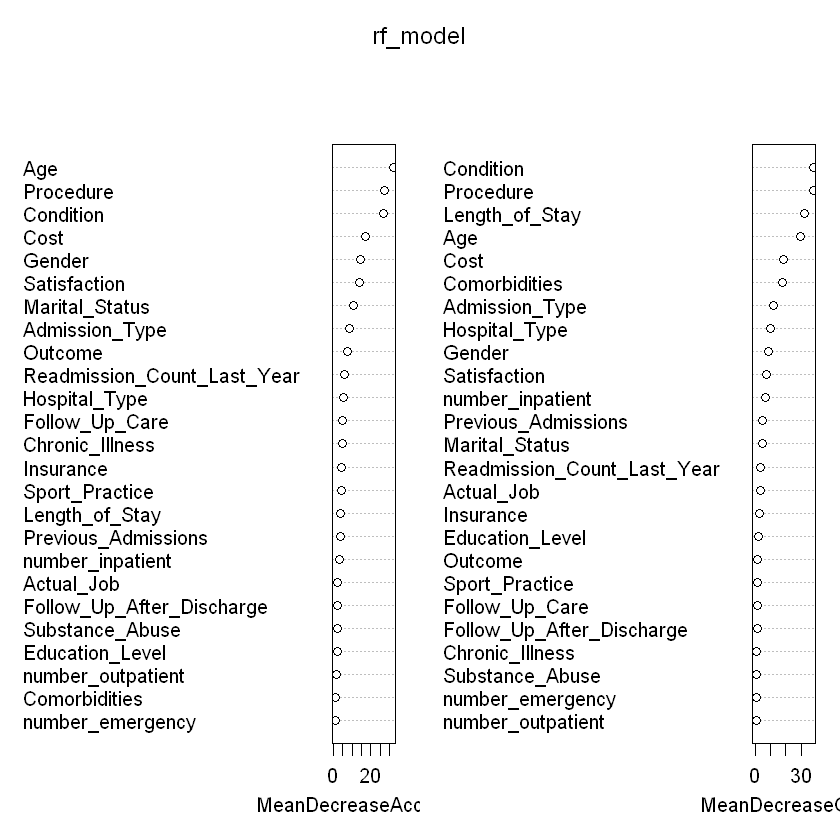

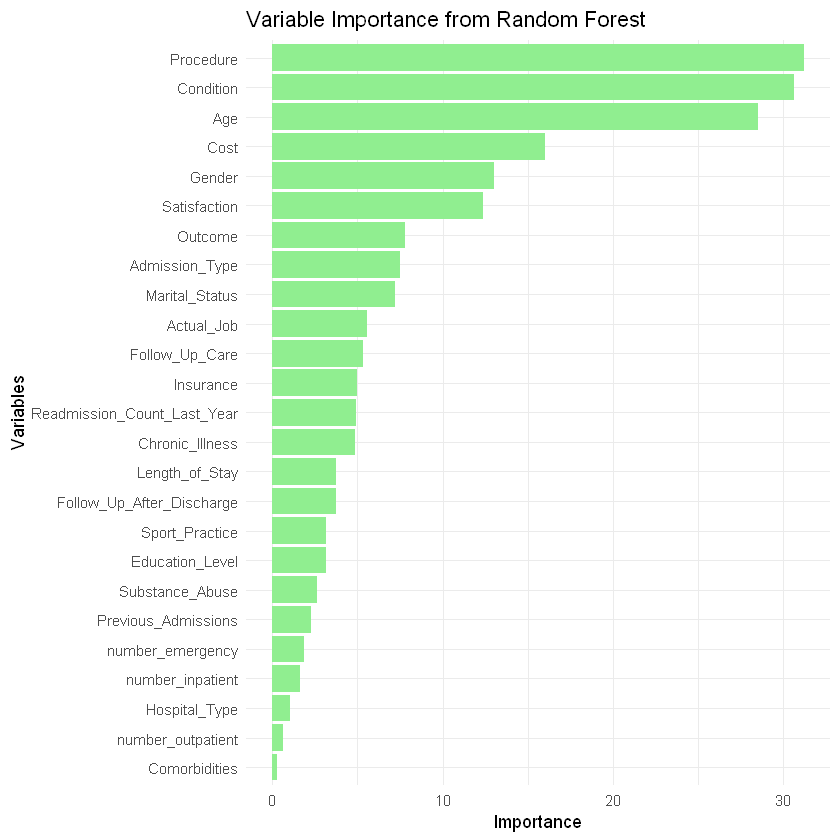

In [17]:
# Predict on the test data
predictions <- predict(rf_model, newdata = test_data)

# Confusion Matrix
confusion_matrix <- table(test_data$Readmission, predictions)
print(confusion_matrix)

# Calculate accuracy
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Accuracy:", round(accuracy * 100, 2), "%"))

# Variable importance
importance_values <- importance(rf_model)
varImpPlot(rf_model)

# Rank variable importance
importance_df <- data.frame(Variable = rownames(importance_values), Importance = importance_values[, 1])
importance_df <- importance_df[order(-importance_df$Importance), ]

# Print ranked variable importance
print(importance_df)

# Plot variable importance
ggplot(importance_df, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Variable Importance from Random Forest", x = "Variables", y = "Importance")

# Save the model and important variables
save(rf_model, file = "rf_model.RData")
save(importance_values, file = "rf_variable_importance.RData")


The bar chart titled "Variable Importance from Random Forest" shows the importance of different variables in predicting the outcome using a Random Forest model. The x-axis represents the importance score, while the y-axis lists the variables.

### Key Insights:
#### Most Important Variables:
- Procedure: This variable has the highest importance score, indicating it is the most critical predictor.
- Condition: This is the second most important variable.
- Age: This variable is also highly important.
- Cost: Another significant predictor.

#### Moderately Important Variables:

- Gender
- Satisfaction
- Outcome
- Admission_Type
- Marital_Status
- Actual_Job
- Follow_Up_Care
- Insurance

#### Less Important Variables:

- Readmission_Count_Last_Year
- Chronic_Illness
- Length_of_Stay
- Follow_Up_After_Discharge
- Sport_Practice
- Education_Level
- Substance_Abuse
- Previous_Admissions
- number_emergency
- number_inpatient
- Hospital_Type
- umber_outpatient
- Comorbidities

## Using a Lasso model with cross-validation 

Lasso (Least Absolute Shrinkage and Selection Operator) Model with cross-validation offers several key advantages including variable selection and regularization. It can shrink the coefficients of less important variables to zero, effectively removing them from the model. This helps in identifying the most significant predictors and simplifies the model.

In [24]:
# Install necessary packages if not already installed
if (!require(glmnet)) {
  install.packages("glmnet")
}
if (!require(dplyr)) {
  install.packages("dplyr")
}
if (!require(readr)) {
  install.packages("readr")
}

# Load necessary libraries
library(glmnet)
library(dplyr)
library(readr)

In [ ]:
# Split the data into predictors and response variable
X <- as.matrix(P_Data[, -which(names(P_Data) == "Readmission")])
y <- P_Data$Readmission

In [25]:
# Subset the data for analysis
P_Data <- subset(Patient_Reamit, select = c("Age", "Gender", "Condition", "Procedure", "Cost", "Length_of_Stay",
                                           "Hospital_Type", "Readmission", "Outcome", "Satisfaction", "number_outpatient",
                                           "number_emergency", "number_inpatient", "Comorbidities", "Previous_Admissions",
                                           "Follow_Up_Care", "Admission_Type", "Readmission_Count_Last_Year", "Chronic_Illness", 
                                           "Marital_Status", "Education_Level", "Substance_Abuse", "Sport_Practice", "Actual_Job",
                                           "Follow_Up_After_Discharge", "Insurance"))

[1] "Best lambda: 0.00718721492773896"
26 x 1 sparse Matrix of class "dgCMatrix"
                                       s0
(Intercept)                  9.990976e-01
Age                          2.467618e-02
Gender                      -1.363764e+00
Condition                   -1.676760e-02
Procedure                   -1.665721e-02
Cost                         2.309271e-05
Length_of_Stay               4.697212e-03
Hospital_Type               -3.386915e-02
Outcome                     -3.348651e-01
Satisfaction                -3.204116e-01
number_outpatient            .           
number_emergency            -1.708771e-01
number_inpatient            -8.904409e-02
Comorbidities                .           
Previous_Admissions          .           
Follow_Up_Care               1.724199e-01
Admission_Type               .           
Readmission_Count_Last_Year  1.459483e-01
Chronic_Illness              .           
Marital_Status               2.592811e-01
Education_Level             -1.248178

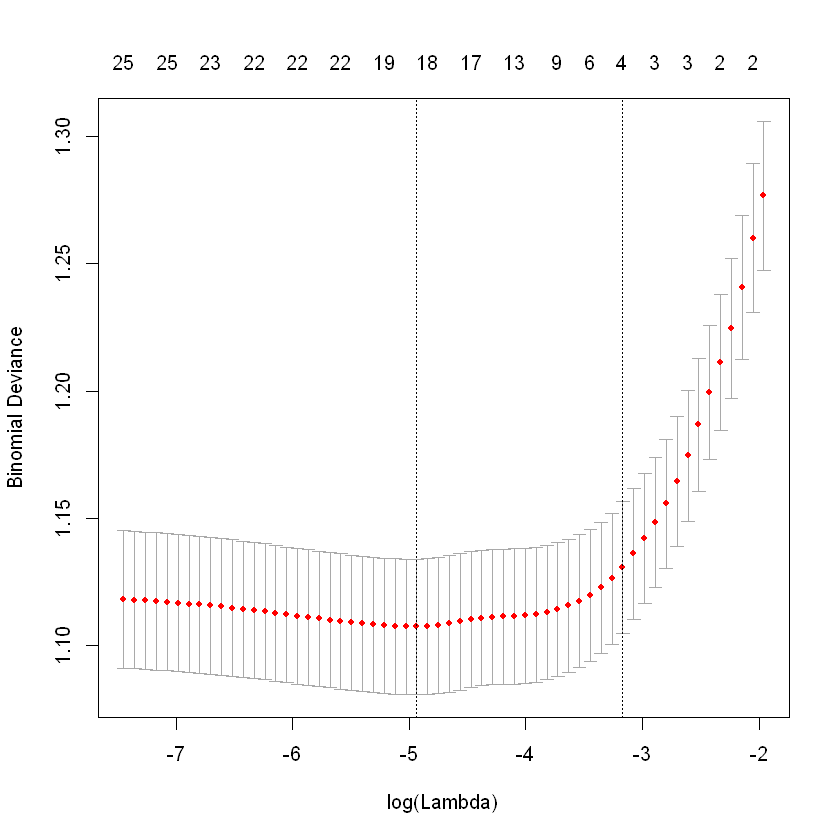

In [26]:
# Convert categorical variables to factors and then to numeric
P_Data$Gender <- as.numeric(as.factor(P_Data$Gender))
P_Data$Condition <- as.numeric(as.factor(P_Data$Condition))
P_Data$Procedure <- as.numeric(as.factor(P_Data$Procedure))
P_Data$Hospital_Type <- as.numeric(as.factor(P_Data$Hospital_Type))
P_Data$Readmission <- as.numeric(ifelse(P_Data$Readmission == "Yes", 1, 0)) # Ensure Readmission is binary
P_Data$Outcome <- as.numeric(as.factor(P_Data$Outcome))
P_Data$Follow_Up_Care <- as.numeric(as.factor(P_Data$Follow_Up_Care))
P_Data$Admission_Type <- as.numeric(as.factor(P_Data$Admission_Type))
P_Data$Chronic_Illness <- as.numeric(as.factor(P_Data$Chronic_Illness))
P_Data$Marital_Status <- as.numeric(as.factor(P_Data$Marital_Status))
P_Data$Education_Level <- as.numeric(as.factor(P_Data$Education_Level))
P_Data$Substance_Abuse <- as.numeric(as.factor(P_Data$Substance_Abuse))
P_Data$Sport_Practice <- as.numeric(as.factor(P_Data$Sport_Practice))
P_Data$Actual_Job <- as.numeric(as.factor(P_Data$Actual_Job))
P_Data$Follow_Up_After_Discharge <- as.numeric(as.factor(P_Data$Follow_Up_After_Discharge))
P_Data$Insurance <- as.numeric(as.factor(P_Data$Insurance))

# Split the data into predictors and response variable
X <- as.matrix(P_Data[, -which(names(P_Data) == "Readmission")])
y <- P_Data$Readmission

# Set seed for reproducibility
set.seed(42)

# Perform Lasso regression with cross-validation
cv_lasso <- cv.glmnet(X, y, alpha = 1, family = "binomial")

# Print the best lambda value
best_lambda <- cv_lasso$lambda.min
print(paste("Best lambda:", best_lambda))

# Plot cross-validation results
plot(cv_lasso)

# Fit the Lasso model with the best lambda
lasso_model <- glmnet(X, y, alpha = 1, family = "binomial", lambda = best_lambda)

# Print the coefficients
print(coef(lasso_model))

# Evaluate the model
# Split the data into training and testing sets
train_index <- sample(seq_len(nrow(P_Data)), size = 0.7 * nrow(P_Data))
train_data <- P_Data[train_index, ]
test_data <- P_Data[-train_index, ]

# Prepare the training and testing matrices
X_train <- as.matrix(train_data[, -which(names(train_data) == "Readmission")])
y_train <- train_data$Readmission
X_test <- as.matrix(test_data[, -which(names(test_data) == "Readmission")])
y_test <- test_data$Readmission

# Predict on the test data
predictions <- predict(lasso_model, newx = X_test, type = "response")
predicted_classes <- ifelse(predictions > 0.5, 1, 0)

# Confusion Matrix
confusion_matrix <- table(y_test, predicted_classes)
print(confusion_matrix)

# Calculate accuracy
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Accuracy:", round(accuracy * 100, 2), "%"))

The best lambda value, found through cross-validation, is approximately 0.0072. This value controls the amount of regularization applied in the Lasso model. Lower values of lambda lead to less regularization, while higher values lead to more.

- The coefficients represent the log-odds of the Readmission given a one-unit increase in the predictor, holding all other predictors constant.
- Coefficients with a value of "." have been shrunk to zero by the Lasso regularization, indicating that these predictors are not contributing significantly to the model.
- The intercept (approximately 0.9991) is the log-odds of the Readmission when all predictors are at their reference levels.
- Positive coefficients (e.g., Age, Cost, Length_of_Stay) indicate that an increase in these variables increases the log-odds of readmission.
- Negative coefficients (e.g., Gender, Outcome, Satisfaction) indicate that an increase in these variables decreases the log-odds of readmission.

## Conclusion
Based on the model Model Coefficients, 
- Significant predictors include Age, Gender, Condition, Procedure, Cost, Length_of_Stay, Hospital_Type, Outcome, Satisfaction, number_emergency, number_inpatient, Follow_Up_Care, Readmission_Count_Last_Year, Marital_Status, Education_Level, Substance_Abuse, Sport_Practice, Follow_Up_After_Discharge.

- Predictors like number_outpatient, Comorbidities, Previous_Admissions, Admission_Type, Chronic_Illness, Actual_Job, and Insurance were deemed insignificant by the Lasso model.

<center><h1 style="color:blue; font-size:25px;"> Conclusion on Assumption 1: Key Factors Influencing Patient Readmissions </h1></center>


The comprehensive analysis using chi-squared tests, t-tests, Lasso regression, and Random Forest models supports the assumption that certain key factors significantly influence the likelihood of patient readmissions. By identifying these factors, we can better understand the root causes of readmissions and implement targeted interventions to reduce their occurrence.
### Identification of Significant Factors:
#### 1. Chi-Squared Tests:
Identified significant associations between readmission and categorical variables such as:
- Gender
- Condition
- Procedure
- Hospital Type
- Outcome 
- Follow Up Care
- Admission Type
- Chronic Illness
- Marital Status
- Education Level
- Substance Abuse
- Sport Practice
- Actual Job
- Follow_Up_After_Discharge.

#### 2. T-Tests:
Found significant differences between patients who were readmitted and those who were not in continuous variables such as: 
- Age 
- Cost
- Length of Stay
- Satisfaction
- Number outpatient
- Number Emergency
- Number inpatient
- Comorbidities
- Previous Admissions
- Readmission Count Last Year
#### 3. Model Insights
##### a. Lasso Regression:
Highlighted the most influential predictors by shrinking less important variables to zero.
Significant predictors included Age: 
- Gender
- Condition
- Procedure
- Cost
- Length of Stay
- Hospital Type
- Outcome
- Satisfaction
- Number emergency
- Number inpatient
- Follow Up Care
- Readmission Count Last Year
- Marital Status
- Education Level
- Substance Abuse
- Sport Practice
- Follow Up After Discharge.
##### a. Random Forest
Provided variable importance measures that confirmed the importance of several variables identified by Lasso regression.
Important variables included: 
- Age
- Gender
- Condition
- Procedure
- Cost
- Length of Stay
- Hospital Type
- Outcome
- Satisfaction
- number emergency
- Number inpatient
- Follow Up Care
- Readmission Count Last Year
- Marital Status
- Education Level
- Substance Abuse
- Sport Practice
- Follow Up After Discharge.

Based on the combined insights from chi-squared tests, t-tests, Lasso regression, and Random Forest models, the variables can be classified by their importance in contributing to readmission as follows:

#### High Importance:
- Age
- Gender
- Condition
- Procedure
- Cost
- Length_of_Stay
- Hospital_Type
- Outcome
- Satisfaction
- Number_emergency
- Number_inpatient
- Follow Up Care
- Readmission Count Last Year
- Marital Status
- Education Level
- Substance Abuse
- Sport Practice
- Follow Up After Discharge

#### Moderate Importance:
- number_outpatient
- Comorbidities
- Previous_Admissions
- Admission_Type
- Chronic_Illness
- Actual_Job
- Insurance

These findings provide a comprehensive understanding of the factors that contribute to patient readmissions, allowing for targeted interventions and policy development to improve patient outcomes and reduce readmission rates.

>The second assumption is that a predictive model can categorize each patient as "at-risk" or "not at risk" by assigning a probability of readmission. Building on the insights gained from identifying key factors, we can develop a predictive model that utilizes these significant variables to estimate the likelihood of readmission for each patient. This model can help healthcare providers proactively manage patients at high risk of readmission by implementing personalized care plans and interventions.

## Building a Predictive Model: The Logistic Regression 

### 1. Data Preparation

<p style="font-size:15px;"> Ensure that the data is properly loaded and prepared.</p>

In [17]:
# Load necessary libraries
library(dplyr)
library(readr)
library(ggplot2)
library(pROC)
library(broom)
library(car)

In [44]:
set.seed(1234)
create_train_test <- function(P_Data, size = 0.7, train = TRUE) {
  n_row = nrow(P_Data)
  total_row = size * n_row
  train_sample <- 1: total_row
  if (train == TRUE) {
    return (P_Data[train_sample, ])
  } else {
    return (P_Data[-train_sample, ])
  }
}
data_train <- create_train_test(P_Data, 0.7, train = TRUE)
data_test <- create_train_test(P_Data, 0.7, train = FALSE)

dim(data_train)  #=== Dimension of the train data
dim(data_test)   #=== dimension of the test data

[1] 688  24

[1] 296  24

In [46]:
MODEL = glm(Readmission ~ Age + Gender +Condition+Length_of_Stay + Hospital_Type+Outcome
            + Satisfaction + number_emergency + number_inpatient + Comorbidities+ Previous_Admissions
            + Follow_Up_Care + Admission_Type + Readmission_Count_Last_Year + Chronic_Illness
            + Marital_Status + Education_Level + Substance_Abuse + Sport_Practice + Actual_Job
            + Follow_Up_After_Discharge + Insurance, data=data_train, family=binomial(link='logit'))

In [47]:
summary(MODEL )
print(MODEL)



Call:
glm(formula = Readmission ~ Age + Gender + Condition + Length_of_Stay + 
    Hospital_Type + Outcome + Satisfaction + number_emergency + 
    number_inpatient + Comorbidities + Previous_Admissions + 
    Follow_Up_Care + Admission_Type + Readmission_Count_Last_Year + 
    Chronic_Illness + Marital_Status + Education_Level + Substance_Abuse + 
    Sport_Practice + Actual_Job + Follow_Up_After_Discharge + 
    Insurance, family = binomial(link = "logit"), data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2128  -0.6320  -0.3781   0.6620   2.4055  

Coefficients: (2 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -6.53642    3.37563  -1.936 0.052824 .  
Age                             0.05998    0.03183   1.884 0.059550 .  
GenderMale                      0.20119    1.16036   0.173 0.862348    
ConditionAppendicitis           2.91214    0.81294   3.582


Call:  glm(formula = Readmission ~ Age + Gender + Condition + Length_of_Stay + 
    Hospital_Type + Outcome + Satisfaction + number_emergency + 
    number_inpatient + Comorbidities + Previous_Admissions + 
    Follow_Up_Care + Admission_Type + Readmission_Count_Last_Year + 
    Chronic_Illness + Marital_Status + Education_Level + Substance_Abuse + 
    Sport_Practice + Actual_Job + Follow_Up_After_Discharge + 
    Insurance, family = binomial(link = "logit"), data = data_train)

Coefficients:
                   (Intercept)                             Age  
                      -6.53642                         0.05998  
                    GenderMale           ConditionAppendicitis  
                       0.20119                         2.91214  
               ConditionCancer             ConditionChildbirth  
                       2.09579                         1.51956  
             ConditionDiabetes          ConditionFractured Arm  
                       0.18386               

In [48]:
exp(coef(MODEL))

(Intercept)                            Age 
                   0.001449668                    1.061811744 
                    GenderMale          ConditionAppendicitis 
                   1.222857997                   18.396092537 
               ConditionCancer            ConditionChildbirth 
                   8.131883453                    4.570216002 
             ConditionDiabetes         ConditionFractured Arm 
                   1.201850115                   12.790602274 
        ConditionFractured Leg          ConditionHeart Attack 
                   0.635614337                   37.843276491 
        ConditionHeart Disease          ConditionHypertension 
                  46.543589647                    0.189349599 
        ConditionKidney Stones        ConditionOsteoarthritis 
                   2.072153505                    1.238623296 
      ConditionProstate Cancer ConditionRespiratory Infection 
                   0.763370479                             NA 
               ConditionStroke                 Length_of_Stay 
                   5.669463326                    1.014889855 
        Hospital_TypeSpecialty          Hospital_TypeTeaching 
                   0.702188217                    0.345873311 
                 OutcomeStable                   Satisfaction 
                            NA                    2.078382399 
              number_emergency               number_inpatient 
                   0.257413917                    0.964725857 
                 Comorbidities            Previous_Admissions 
                   0.990178809                    0.953793552 
             Follow_Up_CareYes        Admission_TypeEmergency 
                   1.742732734                    0.594701302 
       Admission_TypeUndefined           Admission_TypeUrgent 
                   0.472186305                    0.699555288 
   Readmission_Count_Last_Year             Chronic_IllnessYes 
                   1.184082740                    0.896900103 
         Marital_StatusMarried           Marital_StatusSingle 
                   0.627043587                    2.174084470 
       Education_LevelGraduate     Education_LevelHigh school 
                   0.617637325                    0.732539020 
            Substance_AbuseYes              Sport_PracticeYes 
                   1.124947536                    1.098156042 
           Actual_JobPart-time              Actual_JobRetired 
                   0.692906232                    0.964405500 
          Actual_JobUnemployed   Follow_Up_After_DischargeYes 
                   1.187358656                    0.668431541 
              InsurancePrivate                InsurancePublic 
                   1.054450870                    0.950742030

In [49]:
MODEL$fitted.values[1:50] 

1          2          3          4          5          6          7 
0.96278927 0.32008156 0.61565194 0.59778783 0.94377189 0.18862296 0.60733338 
         8          9         10         11         12         13         14 
0.11888611 0.95264525 0.07132914 0.30932604 0.53830444 0.20972138 0.20274427 
        15         16         17         18         19         20         21 
0.27149548 0.87724390 0.43791042 0.72210606 0.55716131 0.65204761 0.54894134 
        22         23         24         25         26         27         28 
0.84088313 0.23500396 0.98019203 0.08619710 0.26577098 0.45309312 0.19759069 
        29         30         31         32         33         34         35 
0.37309952 0.67152909 0.92459139 0.55043566 0.40502877 0.52790430 0.62101631 
        36         37         38         39         40         41         42 
0.07171003 0.36632370 0.13661381 0.95753053 0.12607726 0.13576626 0.11939385 
        43         44         45         46         47         48         49 
0.30633075 0.27533930 0.23738578 0.95564562 0.38770711 0.63769068 0.73475349 
        50 
0.66261237

In [ ]:
predict <- predict(MODEL, data_test, type = 'response')

In [51]:
lapply(MODEL, class)[1:3]
MODEL$aic

$coefficients
[1] "numeric"

$residuals
[1] "numeric"

$fitted.values
[1] "numeric"

[1] 697.311

In [53]:
table_mat <- table(data_test$Readmission, predict > 0.5)
table_mat

   
    FALSE TRUE
  0   153   32
  1    51   60

In [54]:
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)

In [55]:
accuracy_Test 


[1] 0.7195946

In [56]:
precision <- function(matrix) {
#-----------------------------True Positive -------------
  tp <- matrix[2, 2]
#--------------------------- False Positive
  fp <- matrix[1, 2]
  return (tp / (tp + fp))
}
recall <- function(matrix) {
#------------------------------- True Positive
  tp <- matrix[2, 2] #-----------False Positive
  fn <- matrix[2, 1]
  return (tp / (tp + fn))
}
#-----------------------------Test the fuction
prec <- precision(table_mat)
prec
rec <- recall(table_mat)
rec
#===============================oo=======================================

# ----------The F1 score based on those two metric (Precision and Recall)
F1 <- 2 * ((prec * rec) / (prec + rec))
F1     #----------------------------------------The F1 score is 94%



[1] 0.6521739

[1] 0.5405405

[1] 0.591133

In [57]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 3.6.3"


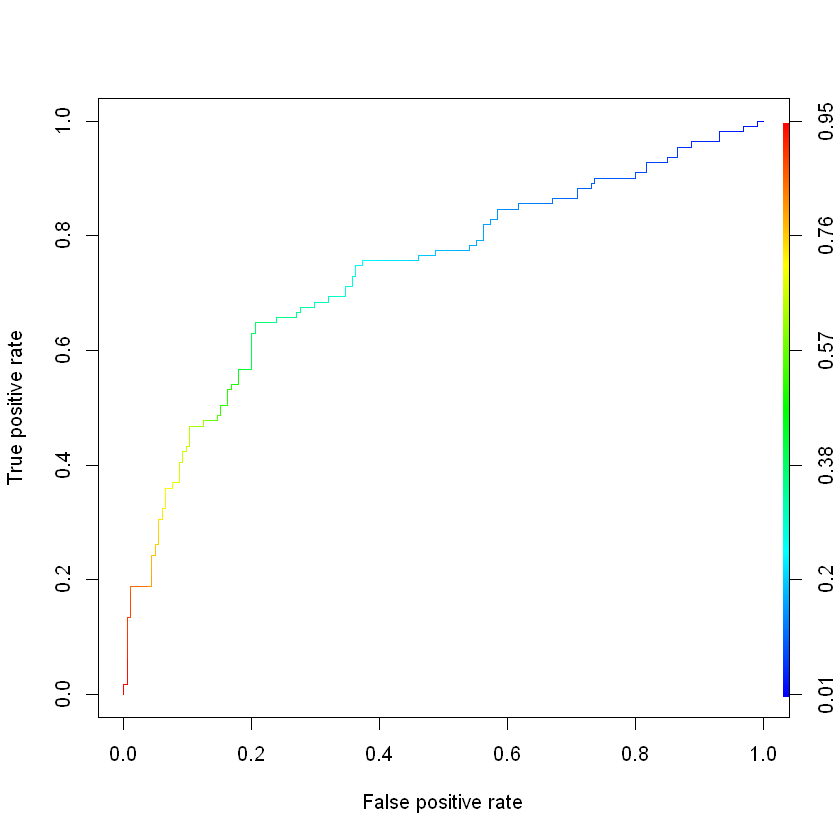

In [58]:
ROCRpred <- prediction(predict, data_test$Readmission)
ROCRperf <- performance(ROCRpred, 'tpr', 'fpr')
plot(ROCRperf, colorize = TRUE, text.adj = c(-0.2, 1.7))

In [ ]:
data_test$Readmission <- predict(MODEL, newdata = data_test, type = "response")   #========== Test data Predict
View(data_test)

In [62]:
P_Data$Readmission <- predict(MODEL, newdata = P_Data, type = "response")  #====== subset without FY 2020 Predict
View(P_Data)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


Age,Gender,Condition,Length_of_Stay,Hospital_Type,Readmission,Outcome,Satisfaction,number_outpatient,number_emergency,...,Admission_Type,Readmission_Count_Last_Year,Chronic_Illness,Marital_Status,Education_Level,Substance_Abuse,Sport_Practice,Actual_Job,Follow_Up_After_Discharge,Insurance
45,Female,Heart Disease,5,General,0.96278927,Recovered,4,0,0,...,Elective,4,No,Married,High school,No,Yes,Full-time,No,Public
60,Male,Diabetes,3,General,0.32008156,Stable,3,0,0,...,Elective,0,No,Divorced,Graduate,No,Yes,Unemployed,Yes,Public
32,Female,Fractured Arm,1,Teaching,0.61565194,Recovered,5,2,0,...,Elective,1,No,Single,Graduate,No,Yes,Retired,Yes,None
75,Male,Stroke,7,Teaching,0.59778783,Stable,2,0,0,...,Elective,4,No,Divorced,Graduate,No,Yes,Unemployed,Yes,Private
50,Female,Cancer,10,General,0.94377189,Recovered,4,0,0,...,Urgent,4,Yes,Single,High school,No,Yes,Retired,No,Public
68,Male,Hypertension,2,General,0.18862296,Stable,4,0,0,...,Emergency,2,Yes,Married,College,Yes,Yes,Unemployed,Yes,Private
55,Female,Appendicitis,4,Teaching,0.60733338,Recovered,3,0,0,...,Emergency,1,Yes,Divorced,High school,No,Yes,Full-time,No,Public
40,Male,Fractured Leg,6,Specialty,0.11888611,Recovered,4,0,0,...,Emergency,2,No,Divorced,College,Yes,Yes,Full-time,Yes,None
70,Female,Heart Attack,8,General,0.95264525,Stable,2,0,0,...,Emergency,1,Yes,Single,College,Yes,No,Unemployed,Yes,None
25,Male,Allergic Reaction,1,Teaching,0.07132914,Recovered,5,0,0,...,Elective,2,Yes,Divorced,Graduate,No,No,Unemployed,Yes,Public
